Exercises from:
https://ds.codeup.com/stats/hypothesis-testing-overview/
https://ds.codeup.com/stats/compare-means/

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

##### Has the network latency gone up since we switched internet service providers?

H0: Network latency has not gone up since switching internet service provers, ie the old provider was faster

Ha: The new provider has resulted in network latency going up

Accept H0 and H0 is true (True Negative):
    We accepted that network latency has not gone up and indeed network latency has not gone up with the new provider
    
Accept H0 but H0 is false (False Negative):
    We accepted that network latency has not gone up with the new provider but it actually has

Reject H0 but H0 is true (False positive):
    We rejected that network latency has not gone up with the new provider (ie we accepted that it has gone up with new provider) but actually latency has not gone up with the new provider.
    
Reject H0 and H0 is false (True Positive):
    We rejected that network latency has not gone up with the new provider (ie we accepted that it has gone up with the new provider) and latency has indeed gone up with the new provider

##### Is the website redesign any good?

H0: The old and new website versions are no better than each other, say for attracting traffic or clicks

Ha: The new website version is better than the old, say at attracting traffic/clicks

True Negative (Accept H0 and H0 is True): Accepted that the two versions of the website are no better than each other and that is true

Accept H0 but H0 is false (False negative): Accepted that the two versons are no better from each other but actually the redesign (new version) is better

Reject H0 but H0 is True (False positive): We rejected that the two versions are no better from each other ( so we thought the redesign is better) but actually they are no better from each other

Reject H0 and H0 is False (True positive): We rejected that the two versions are no better from each other (accepted that the redesign is better) and the new version is in fact better

##### Is our television ad driving more sales?

H0: The tv ad has no effect on sales - sales are the same before and after the ad

Ha: The tv ad has caused greater sales - sales are greater after the ad than before

Accept H0 and H0 is True (True negative): Accepted that the tv ad has not had any effect on sales and it hasn't

Accept H0 but H0 is False (False negative): Accepted that the tv ad has not had any effect on sales but it has in fact had an effect

Reject H0 but H0 is True (False positive): We rejected that the tv ad is not causing sales to go up but sales are not actually going up from the ad

Reject H0 and H0 is False (True positive): we rejected that the tv ad is not causing sales to go up and sales are in fact going up after all - ie the ad is causing sales to go up

### T-Test Exercises

In [30]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns
from env import get_db_url
import matplotlib.pyplot as plt

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

Use an independent t-test (2 sample)

    Is the average time for office 2 to sell greater than the average time for office 1 to sell?

Hypothesis:
H0 = no difference in average time it takes to sell homes for different offices
Ha = Office 2 average time to sell > Office 1 average time to sell

In [21]:
alpha = 0.05
office_1 = np.random.normal(90,15,40)
office_2 = np.random.normal(100,20,50)

Verify assumptions:

    1. Independent samples: YES, two different offices
    2. Normal distribution: YES, we're given mean and standard deviation. Also > 30 samples.
    3. Equal variances: 225 vs 400 , not equal

In [22]:
t, p = stats.ttest_ind(office_2, office_1, equal_var=False)
t, p / 2

(2.98852667934723, 0.001858060113949723)

In [23]:
print("is p/2 < alpha? ", p / 2 < alpha)
print("is t > 0? ", t > 0)


is p/2 < alpha?  True
is t > 0?  True


In [24]:
if p / 2 > alpha:
    print("We fail to reject \$H_{0}$")
elif t < 0:
    print("We fail to reject \$H_{0}$")
else:
    print("We reject $H_{0}$")


We reject $H_{0}$


Is office 2's selling time significantly different than office 1's?
H0: sell time for office 2 is equal to office 1's
Ha: sell time for office 2 is not equal to office 1's

In [25]:
t, p = stats.ttest_ind(office_2, office_1, equal_var=False)
t, p

(2.98852667934723, 0.003716120227899446)

In [27]:
print("Reject $H_{0}$? ", p < alpha)

Reject $H_{0}$?  True


Is office 2's selling time significantly less than office 1's?
H0: sell time for office 2 is equal to sell time for office 1
Ha: sell time for office 2 is less than that of office 1

In [28]:
t, p = stats.ttest_ind(office_2, office_1, equal_var=False)
t, p

(2.98852667934723, 0.003716120227899446)

In [29]:
print("Is t < 0? ", t < 0)

print("is p/2 < alpha? ", p / 2 < alpha)


Is t < 0?  False
is p/2 < alpha?  True


#### Load the mpg dataset and use it to answer the following questions:

In [50]:
mpg = sns.load_dataset('mpg')

In [52]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

H0: mpg is the same between 2008 and 1999
Ha: mpg is not the same between 2008 and 1999

In [58]:
alpha = 0.05

In [53]:
fe_2008 = mpg[mpg.model_year == 78].mpg
fe_1999 = mpg[mpg.model_year == 81].mpg

<AxesSubplot:>

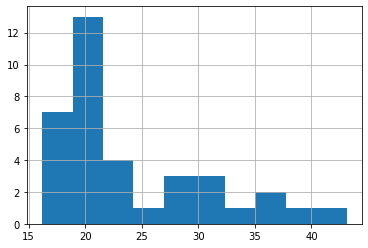

In [55]:
fe_2008.hist()

<AxesSubplot:>

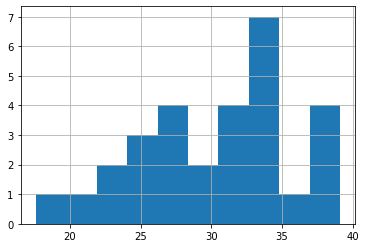

In [56]:
fe_1999.hist()

Assumptions:

    1. Normal: YES
    2. Independent: YES
    3. Variance: Not quite

In [59]:
fe_1999.var()

31.26448275862069

In [60]:
fe_2008.var()

47.58301587301586

In [62]:
t, p = stats.ttest_ind(fe_1999, fe_2008, equal_var = False)
t, p

(4.04958230403348, 0.00014301051524102693)

In [63]:
p < alpha


True

Reject null hypothesis - mpg between years is significantly different

In [64]:
stats.kruskal(fe_1999, fe_2008)

KruskalResult(statistic=14.050358167364976, pvalue=0.00017797993243739497)

Are compact cars more fuel-efficient than the average car?

In [65]:
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

H0: compact cars are no different in fuel efficiency as the average

Do manual cars get better gas mileage than automatic cars?